In [2]:
import torch
import torch.autograd as autograd         # computation graph
from torch import Tensor                  # tensor node in the computation graph
import torch.nn as nn                     # neural networks
import torch.optim as optim               # optimizers e.g. gradient descent, ADAM, etc.

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker
from torch.nn.parameter import Parameter

import numpy as np
import time
from pyDOE import lhs         #Latin Hypercube Sampling
import scipy.io

from smt.sampling_methods import LHS
from scipy.io import savemat

#Set default dtype to float32
torch.set_default_dtype(torch.float)

#PyTorch random number generator
torch.manual_seed(1234)

# Random number generators in other libraries
np.random.seed(1234)

device = torch.device('cpu')

print(device)

if device == 'cuda': 
    print(torch.cuda.get_device_name())

cpu


In [3]:
def true_smooth(x): #[-3,3]
    term1 = (np.power(x,3) - x)
    term2 = np.sin(7*x)/7  
    
    term3 = np.sin(12*x)
    term12 = np.multiply(term1,term2)

    return 50*(term12  + term3)


In [4]:
# Domain bounds
prob_name = 'Regr_smooth_'

lb = np.array(-3.0)  # [-1. 0.]
ub = np.array(3.0) # [1.  0.99]

x_test = np.linspace(lb,ub,1000).reshape(-1,1)
u_true = true_smooth(x_test)

x_test_tensor = torch.from_numpy(x_test).float().to(device)

In [5]:
data_stan = scipy.io.loadmat('Regr_smooth_Stan.mat')
data_tanh = scipy.io.loadmat('Regr_smooth_tanh.mat')
data_atanh = scipy.io.loadmat('Regr_smooth_atanh.mat')
data_swish = scipy.io.loadmat('Regr_smooth_Swish.mat')
data_rowdy = scipy.io.loadmat('Regr_smooth_rowdy.mat')


num_steps = 5000

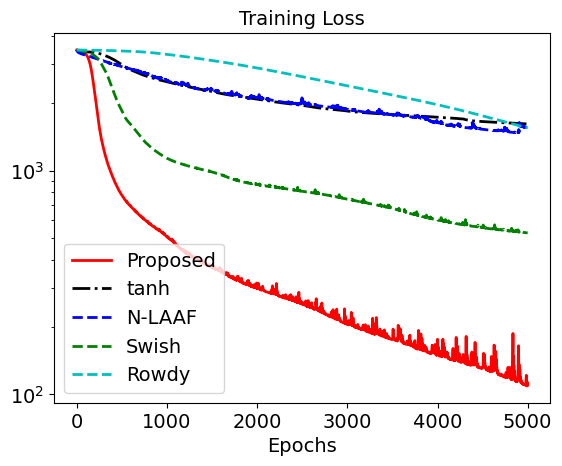

In [6]:
train_loss_stan =  data_stan['train_loss']
train_loss_tanh =  data_tanh['train_loss']
train_loss_atanh =  data_atanh['train_loss']
train_loss_swish =  data_swish['train_loss']
train_loss_rowdy =  data_rowdy['train_loss']


mean_train_loss_stan = np.zeros((num_steps,1))
mean_train_loss_tanh = np.zeros((num_steps,1))
mean_train_loss_atanh = np.zeros((num_steps,1))
mean_train_loss_swish = np.zeros((num_steps,1))
mean_train_loss_rowdy = np.zeros((num_steps,1))


for i in range(10):
    mean_train_loss_stan= mean_train_loss_stan + train_loss_stan[i][:num_steps].reshape(-1,1)
    mean_train_loss_tanh = mean_train_loss_tanh + train_loss_tanh[i][:num_steps].reshape(-1,1)
    mean_train_loss_atanh = mean_train_loss_atanh + train_loss_atanh[i][:num_steps].reshape(-1,1)
    mean_train_loss_swish = mean_train_loss_swish + train_loss_swish[i][:num_steps].reshape(-1,1)
    mean_train_loss_rowdy = mean_train_loss_rowdy + train_loss_rowdy[i][:num_steps].reshape(-1,1)
    
    
    
mean_train_loss_stan = mean_train_loss_stan/10
mean_train_loss_tanh = mean_train_loss_tanh/10
mean_train_loss_atanh = mean_train_loss_atanh/10
mean_train_loss_swish = mean_train_loss_swish/10
mean_train_loss_rowdy = mean_train_loss_rowdy/10


fig, ax = plt.subplots()
ax.plot(mean_train_loss_stan,'r',linewidth = 2,label = 'Proposed')
ax.plot(mean_train_loss_tanh,'k-.',linewidth = 2, label = 'tanh')
ax.plot(mean_train_loss_atanh,'b--',linewidth = 2, label = 'N-LAAF')
ax.plot(mean_train_loss_swish,'g--',linewidth = 2, label = 'Swish')
ax.plot(mean_train_loss_rowdy,'c--',linewidth = 2, label = 'Rowdy')


#ax.set_fontvariant('normal')

ax.set_yscale('log')
ax.legend(prop={'size':14})
#x.set_ylim([1e-5,20])
ax.set_title('Training Loss', fontsize=14)
ax.set_xlabel('Epochs',fontsize=14,alpha = 1)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

fig.savefig('Regr_smooth_train_loss.pdf', format='pdf',pad_inches=0, bbox_inches='tight')

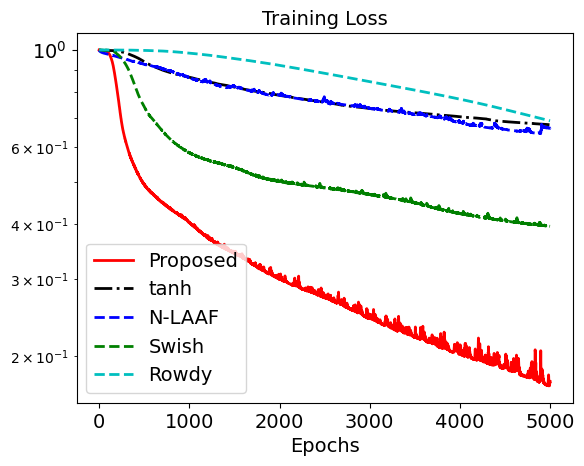

In [7]:
test_loss_stan =  data_stan['test_re']
test_loss_tanh =  data_tanh['test_re']
test_loss_atanh =  data_atanh['test_re']
test_loss_swish =  data_swish['test_re']
test_loss_rowdy =  data_rowdy['test_re']


mean_test_loss_stan = np.zeros((num_steps,1))
mean_test_loss_tanh = np.zeros((num_steps,1))
mean_test_loss_atanh = np.zeros((num_steps,1))
mean_test_loss_swish = np.zeros((num_steps,1))
mean_test_loss_rowdy = np.zeros((num_steps,1))


for i in range(10):
    mean_test_loss_stan= mean_test_loss_stan + test_loss_stan[i][:num_steps].reshape(-1,1)
    mean_test_loss_tanh = mean_test_loss_tanh + test_loss_tanh[i][:num_steps].reshape(-1,1)
    mean_test_loss_atanh = mean_test_loss_atanh + test_loss_atanh[i][:num_steps].reshape(-1,1)
    mean_test_loss_swish = mean_test_loss_swish + test_loss_swish[i][:num_steps].reshape(-1,1)
    mean_test_loss_rowdy = mean_test_loss_rowdy + test_loss_rowdy[i][:num_steps].reshape(-1,1)
    
    
    
mean_test_loss_stan = mean_test_loss_stan/10
mean_test_loss_tanh = mean_test_loss_tanh/10
mean_test_loss_atanh = mean_test_loss_atanh/10
mean_test_loss_swish = mean_test_loss_swish/10
mean_test_loss_rowdy = mean_test_loss_rowdy/10


fig, ax = plt.subplots()
ax.plot(mean_test_loss_stan,'r',linewidth = 2,label = 'Proposed')
ax.plot(mean_test_loss_tanh,'k-.',linewidth = 2, label = 'tanh')
ax.plot(mean_test_loss_atanh,'b--',linewidth = 2, label = 'N-LAAF')
ax.plot(mean_test_loss_swish,'g--',linewidth = 2, label = 'Swish')
ax.plot(mean_test_loss_rowdy,'c--',linewidth = 2, label = 'Rowdy')


#ax.set_fontvariant('normal')

ax.set_yscale('log')
ax.legend(prop={'size':14})
#x.set_ylim([1e-5,20])
ax.set_title('Training Loss', fontsize=14)
ax.set_xlabel('Epochs',fontsize=14,alpha = 1)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

fig.savefig('Regr_smooth_train_loss.pdf', format='pdf',pad_inches=0, bbox_inches='tight')

In [8]:
print(mean_test_loss_stan[-1])
print(mean_test_loss_tanh[-1])
print(mean_test_loss_atanh[-1])
print(mean_test_loss_swish[-1])
print(mean_test_loss_rowdy[-1])

[0.17486481]
[0.67453067]
[0.66274852]
[0.39547924]
[0.68890252]


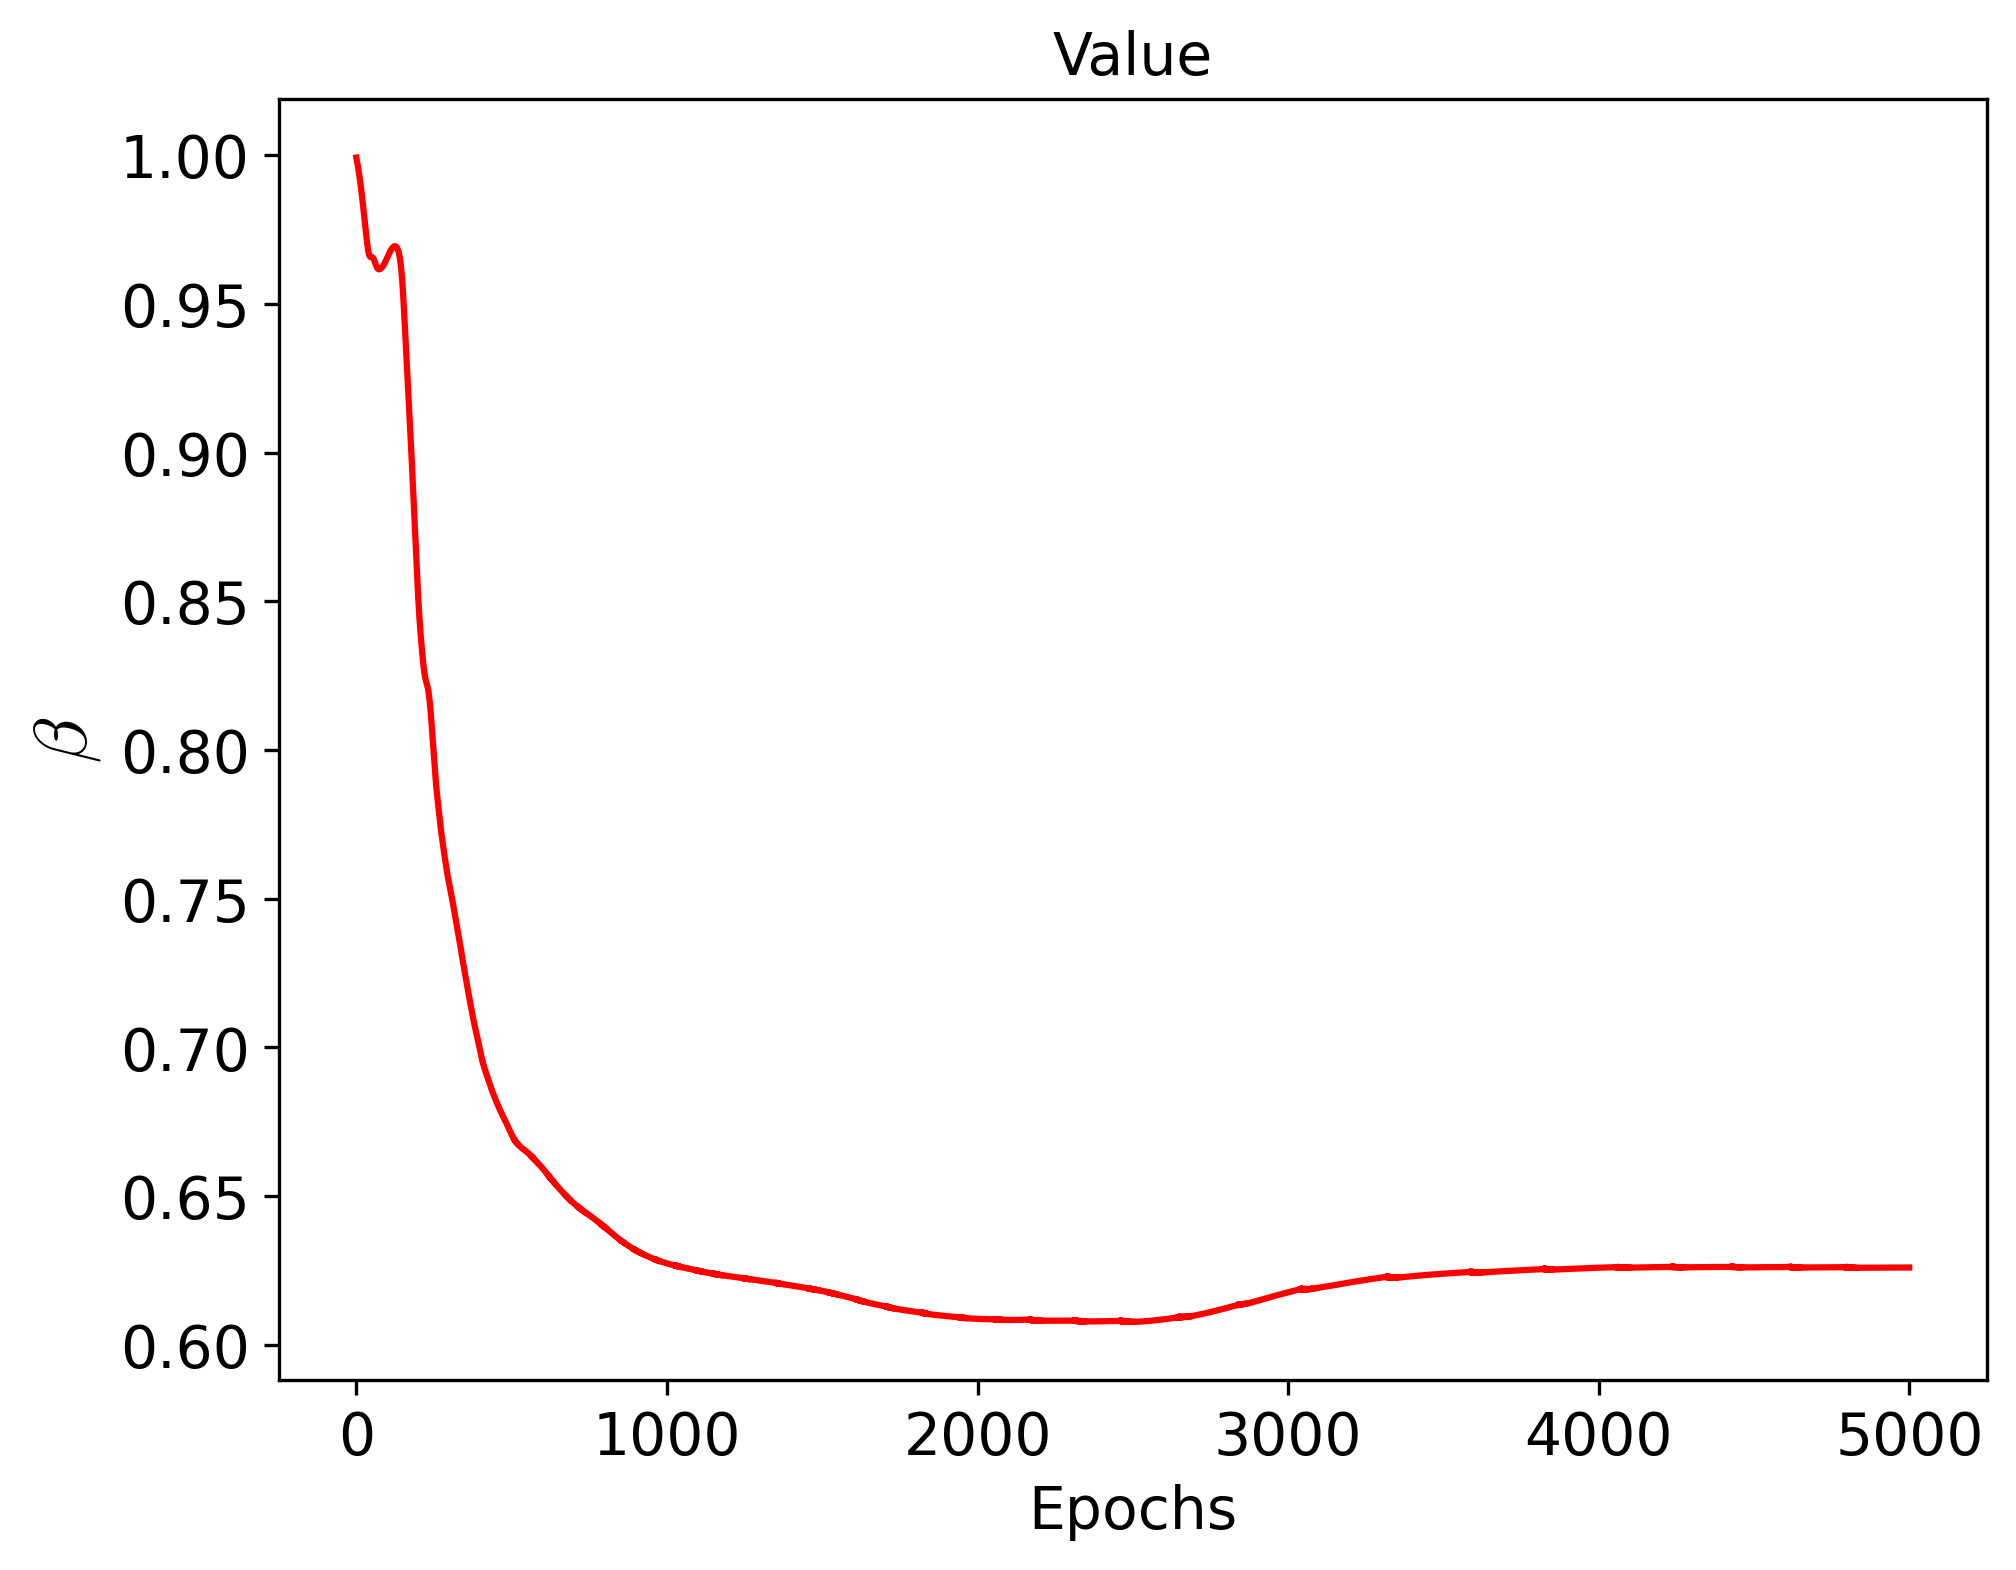

In [9]:
beta_stan =  data_stan['beta']

beta_history = beta_stan[0,:num_steps,35,1] #For the first repetition

fig, ax = plt.subplots()
ax.plot(beta_history,'r')

fig.dpi=300
fig.tight_layout()

ax.set_title('Value', fontsize=14, math_fontfamily='cm')
ax.set_xlabel('Epochs', fontsize=14, math_fontfamily='cm')
ax.set_ylabel('$\\beta $',fontsize=18, math_fontfamily='cm')
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.savefig(prob_name + 'beta_history.eps', format='eps',pad_inches=0, bbox_inches='tight')

In [10]:
class Sequentialmodel_stan(nn.Module):
    
    def __init__(self,layers):
        super().__init__() #call __init__ from parent class 
              
        'activation function'
        self.activation = nn.Tanh()
     
        'loss function'
        self.loss_function = nn.MSELoss(reduction ='mean')
        
        'Initialise neural network as a list using nn.Modulelist'  
        self.linears = nn.ModuleList([nn.Linear(layers[i], layers[i+1]) for i in range(len(layers)-1)])
     
        
        for i in range(len(layers)-1):
            nn.init.xavier_normal_(self.linears[i].weight.data, gain=1.0)
            # set biases to zero
            nn.init.zeros_(self.linears[i].bias.data)

        
        self.beta = Parameter(torch.ones((layers[1],len(layers)-2)))
        self.beta.requiresGrad = True
            
            
    'foward pass'
    def forward(self,x):
        if torch.is_tensor(x) != True:         
            x = torch.from_numpy(x)                
        
        u_b = torch.from_numpy(ub).float().to(device)
        l_b = torch.from_numpy(lb).float().to(device)
                      
        #preprocessing input 
        x = (x - l_b)/(u_b - l_b) #feature scaling
        
        #convert to float
        a = x.float()
        
        for i in range(len(layers)-2):
            z = self.linears[i](a)
            a = self.activation(z) + self.beta[:,i]*z*self.activation(z)
    
        a = self.linears[-1](a) 
        
        return a
    
    
    def loss(self,x,u):

        loss_val = self.loss_function(self.forward(x),u)
        
        return loss_val
        
    'test neural network'
    def test(self):
        u_pred = self.forward(x_test_tensor)       
        u_pred = u_pred.cpu().detach().numpy()
        
        return u_pred
    
    def test_loss(self):
        u_pred = self.test()
        
        test_mse_loss = np.mean(np.square(u_pred.reshape(-1,1) - u_true.reshape(-1,1)))
        test_re_loss = np.linalg.norm(u_pred.reshape(-1,1) - u_true.reshape(-1,1),2)/u_true_norm
        
        return test_mse_loss, test_re_loss  
#--------------------------------------------------------------------------------------------------
class Sequentialmodel_tanh(nn.Module):
    
    def __init__(self,layers):
        super().__init__() #call __init__ from parent class 
              
        'activation function'
        self.activation = nn.Tanh()
     
        'loss function'
        self.loss_function = nn.MSELoss(reduction ='mean')
        
        'Initialise neural network as a list using nn.Modulelist'  
        self.linears = nn.ModuleList([nn.Linear(layers[i], layers[i+1]) for i in range(len(layers)-1)])
     
        
        for i in range(len(layers)-1):
            nn.init.xavier_normal_(self.linears[i].weight.data, gain=1.0)
            # set biases to zero
            nn.init.zeros_(self.linears[i].bias.data)

            
            
    'foward pass'
    def forward(self,x):
        if torch.is_tensor(x) != True:         
            x = torch.from_numpy(x)                
        
        u_b = torch.from_numpy(ub).float().to(device)
        l_b = torch.from_numpy(lb).float().to(device)
                      
        #preprocessing input 
        x = (x - l_b)/(u_b - l_b) #feature scaling
        
        #convert to float
        a = x.float()
        
        for i in range(len(layers)-2):
            z = self.linears[i](a)
            a = self.activation(z) 
    
        a = self.linears[-1](a) 
        
        return a
    
    
    def loss(self,x,u):

        loss_val = self.loss_function(self.forward(x),u)
        
        return loss_val
        
    'test neural network'
    def test(self):
        u_pred = self.forward(x_test_tensor)       
        u_pred = u_pred.cpu().detach().numpy()
        
        return u_pred
    
    def test_loss(self):
        u_pred = self.test()
        
        test_mse_loss = np.mean(np.square(u_pred.reshape(-1,1) - u_true.reshape(-1,1)))
        test_re_loss = np.linalg.norm(u_pred.reshape(-1,1) - u_true.reshape(-1,1),2)/u_true_norm
        
        return test_mse_loss, test_re_loss  
#-----------------------------------------------------------------------------------------------------------
class Sequentialmodel_atanh(nn.Module):
    
    def __init__(self,layers):
        super().__init__() #call __init__ from parent class 
              
        'activation function'
        self.activation = nn.Tanh()
     
        'loss function'
        self.loss_function = nn.MSELoss(reduction ='mean')
        
        'Initialise neural network as a list using nn.Modulelist'  
        self.linears = nn.ModuleList([nn.Linear(layers[i], layers[i+1]) for i in range(len(layers)-1)])
     
        
        for i in range(len(layers)-1):
            nn.init.xavier_normal_(self.linears[i].weight.data, gain=1.0)
            # set biases to zero
            nn.init.zeros_(self.linears[i].bias.data)

        
        self.alpha = Parameter(torch.ones((layers[1],len(layers)-2)))
        self.alpha.requiresGrad = True
        
        self.n = torch.tensor(10.0)
            
            
    'foward pass'
    def forward(self,x):
        if torch.is_tensor(x) != True:         
            x = torch.from_numpy(x)                
        
        u_b = torch.from_numpy(ub).float().to(device)
        l_b = torch.from_numpy(lb).float().to(device)
                      
        #preprocessing input 
        x = (x - l_b)/(u_b - l_b) #feature scaling
        
        #convert to float
        a = x.float()
        
        for i in range(len(layers)-2):
            z = self.linears[i](a)
            a = self.activation(self.n*self.alpha[:,i]*z)
    
        a = self.linears[-1](a) 
        
        return a
    
    
    def loss(self,x,u):

        loss_val = self.loss_function(self.forward(x),u)
        
        return loss_val
        
    'test neural network'
    def test(self):
        u_pred = self.forward(x_test_tensor)       
        u_pred = u_pred.cpu().detach().numpy()
        
        return u_pred
    
    def test_loss(self):
        u_pred = self.test()
        
        test_mse_loss = np.mean(np.square(u_pred.reshape(-1,1) - u_true.reshape(-1,1)))
        test_re_loss = np.linalg.norm(u_pred.reshape(-1,1) - u_true.reshape(-1,1),2)/u_true_norm
        
        return test_mse_loss, test_re_loss  
#-------------------------------------------------------------------------------------------------------------
class Sequentialmodel_swish(nn.Module):
    
    def __init__(self,layers):
        super().__init__() #call __init__ from parent class 
              
        'activation function'
        self.activation = nn.Sigmoid()
     
        'loss function'
        self.loss_function = nn.MSELoss(reduction ='mean')
        
        'Initialise neural network as a list using nn.Modulelist'  
        self.linears = nn.ModuleList([nn.Linear(layers[i], layers[i+1]) for i in range(len(layers)-1)])
     
        
        for i in range(len(layers)-1):
            nn.init.xavier_normal_(self.linears[i].weight.data, gain=1.0)
            # set biases to zero
            nn.init.zeros_(self.linears[i].bias.data)

        
        self.beta = Parameter(torch.ones((layers[1],len(layers)-2)))
        self.beta.requiresGrad = True
            
            
    'foward pass'
    def forward(self,x):
        if torch.is_tensor(x) != True:         
            x = torch.from_numpy(x)                
        
        u_b = torch.from_numpy(ub).float().to(device)
        l_b = torch.from_numpy(lb).float().to(device)
                      
        #preprocessing input 
        x = (x - l_b)/(u_b - l_b) #feature scaling
        
        #convert to float
        a = x.float()
        
        for i in range(len(layers)-2):
            z = self.linears[i](a)
            a = z*self.activation(self.beta[:,i]*z)
    
        a = self.linears[-1](a) 
        
        return a
    
    
    def loss(self,x,u):

        loss_val = self.loss_function(self.forward(x),u)
        
        return loss_val
        
    'test neural network'
    def test(self):
        u_pred = self.forward(x_test_tensor)       
        u_pred = u_pred.cpu().detach().numpy()
        
        return u_pred
    
    def test_loss(self):
        u_pred = self.test()
        
        test_mse_loss = np.mean(np.square(u_pred.reshape(-1,1) - u_true.reshape(-1,1)))
        test_re_loss = np.linalg.norm(u_pred.reshape(-1,1) - u_true.reshape(-1,1),2)/u_true_norm
        
        return test_mse_loss, test_re_loss  
#-------------------------------------------------------------------------------------------------------------
class Sequentialmodel_rowdy(nn.Module):
    
    def __init__(self,layers):
        super().__init__() #call __init__ from parent class 
              
        'activation function'
        self.activation = nn.Tanh()
     
        'loss function'
        self.loss_function = nn.MSELoss(reduction ='mean')
        
        'Initialise neural network as a list using nn.Modulelist'  
        self.linears = nn.ModuleList([nn.Linear(layers[i], layers[i+1]) for i in range(len(layers)-1)])
     
        
        for i in range(len(layers)-1):
            nn.init.xavier_normal_(self.linears[i].weight.data, gain=1.0)
            # set biases to zero
            nn.init.zeros_(self.linears[i].bias.data)

        self.omega1 = Parameter(torch.ones((len(layers)-2,1))) 

        
        self.alpha = Parameter(torch.zeros(rowdy_terms,len(layers)-2))
        self.omega = Parameter(0.1*torch.ones(rowdy_terms,len(layers)-2))
        
        self.n = torch.tensor(10.0)
            
            
    'foward pass'
    def forward(self,x):
        if torch.is_tensor(x) != True:         
            x = torch.from_numpy(x)                
        
        u_b = torch.from_numpy(ub).float().to(device)
        l_b = torch.from_numpy(lb).float().to(device)
                      
        #preprocessing input 
        x = (x - l_b)/(u_b - l_b) #feature scaling
        
        #convert to float
        a = x.float()
        
        for i in range(len(layers)-2):
            z = self.linears[i](a)
            a = self.activation(self.omega1[i,0]*z)
            for j in range(rowdy_terms):
                a = a + self.alpha[j,i]*self.n*torch.sin((j+1)*self.n*self.omega[j,i]*z)
    
        a = self.linears[-1](a) 
        
        return a
    
    
    def loss(self,x,u):

        loss_val = self.loss_function(self.forward(x),u)
        
        return loss_val
        
    'test neural network'
    def test(self):
        u_pred = self.forward(x_test_tensor)       
        u_pred = u_pred.cpu().detach().numpy()
        
        return u_pred
    
    def test_loss(self):
        u_pred = self.test()
        
        test_mse_loss = np.mean(np.square(u_pred.reshape(-1,1) - u_true.reshape(-1,1)))
        test_re_loss = np.linalg.norm(u_pred.reshape(-1,1) - u_true.reshape(-1,1),2)/u_true_norm
        
        return test_mse_loss, test_re_loss  

In [11]:
layers = np.array([1,50,50,50,50,1]) #9 hidden layers

rowdy_terms = 8

model_stan = Sequentialmodel_stan(layers)
model_tanh = Sequentialmodel_tanh(layers)
model_atanh = Sequentialmodel_atanh(layers)
model_swish = Sequentialmodel_swish(layers)
model_rowdy = Sequentialmodel_rowdy(layers)

u_pred_stan = np.zeros((x_test.shape[0],1))
u_pred_tanh = np.zeros((x_test.shape[0],1))
u_pred_atanh = np.zeros((x_test.shape[0],1))
u_pred_swish = np.zeros((x_test.shape[0],1))
u_pred_rowdy = np.zeros((x_test.shape[0],1))

n_models = 1

for i in range(1,2):
    model_stan.load_state_dict(torch.load(prob_name + 'Stan_' +str(i)+'.pt'))
    u_pred_stan = u_pred_stan + model_stan.test()
    
    model_tanh.load_state_dict(torch.load(prob_name + 'tanh_' +str(i)+'.pt'))
    u_pred_tanh = u_pred_tanh + model_tanh.test()
    
    model_atanh.load_state_dict(torch.load(prob_name + 'atanh_' +str(i)+'.pt'))
    u_pred_atanh = u_pred_atanh + model_atanh.test()
    
    model_swish.load_state_dict(torch.load(prob_name + 'Swish_'+str(i)+'.pt'))
    u_pred_swish = u_pred_swish + model_swish.test()
    
    model_rowdy.load_state_dict(torch.load(prob_name + 'rowdy_'+str(i)+'.pt'))
    u_pred_rowdy = u_pred_rowdy + model_rowdy.test()

u_pred_stan = u_pred_stan/n_models
u_pred_tanh = u_pred_tanh/n_models
u_pred_atanh = u_pred_atanh/n_models
u_pred_swish = u_pred_swish/n_models
u_pred_rowdy = u_pred_rowdy/n_models

u_pred = np.hstack((u_pred_stan,u_pred_tanh,u_pred_atanh,u_pred_swish,u_pred_rowdy))

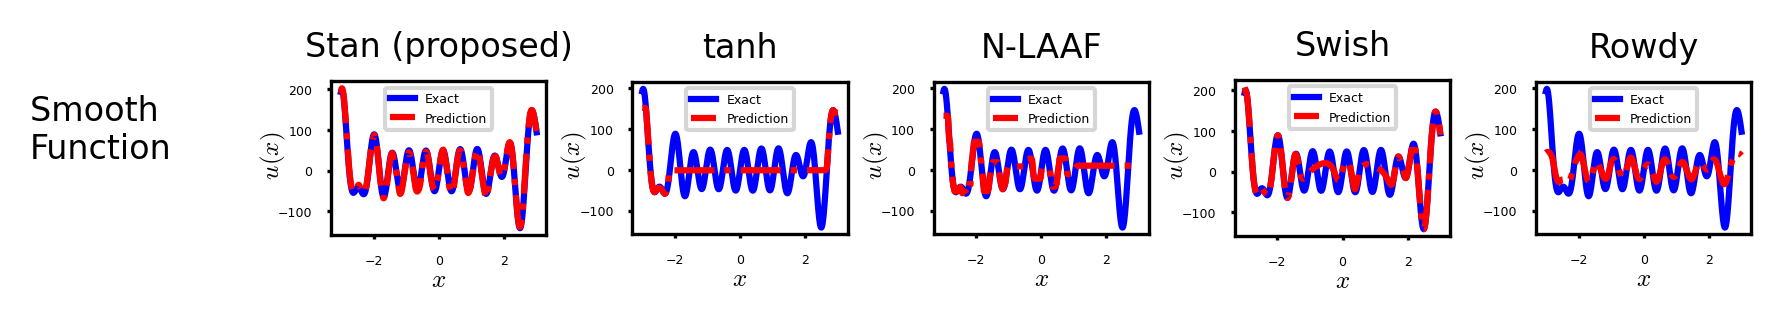

In [50]:
fig, ax = plt.subplots(1,6)

fig.dpi=300
fig.tight_layout()

ax[0].set_aspect(aspect = 1/80)
ax[0].axis('off')
ax[0].text(0,0.5,"Smooth \nFunction",fontsize=8)
#ax[0].text(0,0.45,"Function",fontsize=8)

for i in range(1,6):
    ax[i].plot(x_test,u_true,'b',linewidth = 1.5,label = 'Exact')
    ax[i].plot(x_test,u_pred[:,i-1],'r-.',linewidth = 1.5,label = "Prediction")
    
    ax[i].set_xlabel('$x$', fontsize=6, math_fontfamily='cm', labelpad=0.0)
    ax[i].set_ylabel(' $u(x)$',fontsize=6, math_fontfamily='cm', labelpad=0.0)
    
    ax[i].tick_params(axis='x', labelsize=3,length = 1)
    ax[i].tick_params(axis='y', labelsize=3,length = 1)
    
    ax[i].set_aspect(aspect = 1/80)
    
    ax[i].yaxis.set_label_coords(-0.20,0.5)
    
    ax[i].legend(prop={'size':3},loc = 'upper center')

ax[1].set_title('Stan (proposed)',fontsize=8, math_fontfamily='cm')
ax[2].set_title('tanh',fontsize=8, math_fontfamily='cm')
ax[3].set_title('N-LAAF',fontsize=8, math_fontfamily='cm')
ax[4].set_title('Swish',fontsize=8, math_fontfamily='cm')
ax[5].set_title('Rowdy',fontsize=8, math_fontfamily='cm')

  
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
plt.savefig(prob_name + 'predictions.pdf', format='pdf',pad_inches=0, bbox_inches='tight')

In [21]:
#Relative Error
print('Relative Error')
print(mean_test_loss_stan[-1])
print(mean_test_loss_tanh[-1])
print(mean_test_loss_atanh[-1])
print(mean_test_loss_swish[-1])
print(mean_test_loss_rowdy[-1])

Relative Error
[0.17486481]
[0.67453067]
[0.66274852]
[0.39547924]
[0.68890252]


In [24]:
test_loss_stan =  data_stan['test_mse']
test_loss_tanh =  data_tanh['test_mse']
test_loss_atanh =  data_atanh['test_mse']
test_loss_swish =  data_swish['test_mse']
test_loss_rowdy =  data_rowdy['test_mse']


mean_test_loss_stan = np.zeros((num_steps,1))
mean_test_loss_tanh = np.zeros((num_steps,1))
mean_test_loss_atanh = np.zeros((num_steps,1))
mean_test_loss_swish = np.zeros((num_steps,1))
mean_test_loss_rowdy = np.zeros((num_steps,1))


for i in range(10):
    mean_test_loss_stan = mean_test_loss_stan + test_loss_stan[i,:num_steps].reshape(-1,1)
    mean_test_loss_tanh = mean_test_loss_tanh + test_loss_tanh[i,:num_steps].reshape(-1,1)
    mean_test_loss_atanh = mean_test_loss_atanh + test_loss_atanh[i,:num_steps].reshape(-1,1)
    mean_test_loss_swish = mean_test_loss_swish + test_loss_swish[i,:num_steps].reshape(-1,1)
    mean_test_loss_rowdy = mean_test_loss_rowdy + test_loss_rowdy[i,:num_steps].reshape(-1,1)
    
        
mean_test_loss_stan = mean_test_loss_stan/10
mean_test_loss_tanh = mean_test_loss_tanh/10
mean_test_loss_atanh = mean_test_loss_atanh/10
mean_test_loss_swish = mean_test_loss_swish/10
mean_test_loss_rowdy = mean_test_loss_rowdy/10

print('MSE')
print(mean_test_loss_stan[-1])
print(mean_test_loss_tanh[-1])
print(mean_test_loss_atanh[-1])
print(mean_test_loss_swish[-1])
print(mean_test_loss_rowdy[-1])

MSE
[139.64916091]
[1689.63996122]
[1594.30635393]
[570.58865556]
[1668.34747615]


In [25]:
print('Total Time')
print(np.mean(data_stan['Time']))
print(np.mean(data_tanh['Time']))
print(np.mean(data_atanh['Time']))
print(np.mean(data_swish['Time']))
print(np.mean(data_rowdy['Time']))

Total Time
41.65651657581329
25.558233165740965
37.45700213909149
36.8603178024292
149.9252830505371


In [26]:
# max_time = np.max(np.vstack((data_stan['Time'],data_tanh['Time'],data_atanh['Time'],data_swish['Time'],data_rowdy['Time'])))

# ttime_stan = data_stan['Thresh Time']
# ttime_tanh = data_tanh['Thresh Time']
# ttime_atanh = data_atanh['Thresh Time']
# ttime_swish = data_swish['Thresh Time']
# ttime_rowdy = data_rowdy['Thresh Time']

# ttime_stan[np.isnan(ttime_stan)] = max_time
# ttime_tanh[np.isnan(ttime_tanh)] = max_time
# ttime_atanh[np.isnan(ttime_atanh)] = max_time
# ttime_swish[np.isnan(ttime_swish)] = max_time
# ttime_rowdy[np.isnan(ttime_rowdy)] = max_time

# print('Threshold Time')
# print(np.mean(ttime_stan))
# print(np.mean(ttime_tanh))
# print(np.mean(ttime_atanh))
# print(np.mean(ttime_swish))
# print(np.mean(ttime_rowdy))

KeyError: 'Thresh Time'

In [ ]:
# tep_stan = data_stan['Thresh epoch']
# tep_tanh = data_tanh['Thresh epoch']
# tep_atanh = data_atanh['Thresh epoch']
# tep_swish = data_swish['Thresh epoch']
# tep_rowdy = data_rowdy['Thresh epoch']

# print('Threshold Epoch')
# print(np.mean(tep_stan))
# print(np.mean(tep_tanh))
# print(np.mean(tep_atanh))
# print(np.mean(tep_swish))
# print(np.mean(tep_rowdy))